# Import library

In [248]:
import pandas as pd
import numpy as np

In [249]:
df = pd.read_excel(io="./data/historique_interventions_IA.xlsx", sheet_name="liste inter CATEGORISEES LIGHT")

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Description    599 non-null    object
 1   Activity text  599 non-null    object
 2   S-ens          598 non-null    object
 3   CAT            256 non-null    object
dtypes: object(4)
memory usage: 18.8+ KB


In [251]:
df.columns = [title.lower().replace(" ", "_") for title in df.columns]
df.columns

Index(['description', 'activity_text', 's-ens', 'cat'], dtype='object')

In [252]:
df['s-ens'].unique()

array(['convoyeur principal ', 'etoile entrée', 'poste bouchonnage',
       'format', 'tremie ', 'cellules ', 'IPC', 'HMI', 'bol bouchon',
       'table tournante', 'communication', 'vis sans fin', 'climet',
       'poste remplissage', 'roue entrée', 'ipc', 'pesée',
       'servo commande', 'hmi', 'autom', 'barre ionisante',
       'convoyeur entrée', 'tiroir', 'jog', 'tapis entrée',
       'roue sortie ', 'porte', 'soufflet', 'bi', 'courroie', 'EV',
       'CUVE BOUCHONS', nan, 'BI'], dtype=object)

In [253]:
df['s-ens'].nunique()

33

In [254]:
df['s-ens_cleaned'] = df['s-ens'].str.lower()
df = df[['description','s-ens_cleaned']]
df.dropna(inplace=True)
df.columns = ['description', "labels"]

In [255]:
df

,description,labels
0,Surcharge convoyeur TX124,convoyeur principal
1,casse entree etoile entrée.,etoile entrée
2,Mauvais bouchonnage,poste bouchonnage
3,presence bavure sur un format,format
4,Mauvais bouchonnage,poste bouchonnage
...,...,...
594,PC IPC bloqué,hmi
595,PB poid durant 490,barre ionisante
596,Machine en attente bouchons.,poste bouchonnage
597,Défaut accu mini convoyeur bouchon,poste bouchonnage


In [256]:
count = df.groupby('labels').count().reset_index()

display(count)

,labels,description
0,autom,13
1,barre ionisante,3
2,bi,5
3,bol bouchon,25
4,cellules,61
5,climet,6
6,communication,18
7,convoyeur entrée,9
8,convoyeur principal,30
9,courroie,1


In [257]:
liste_mots_description = " ".join(
    df["description"].str.lower()\
        .str.replace("."," ")\
        .str.replace(","," ")\
        .str.replace("("," ")\
        .str.replace(")"," ")\
        .str.replace('"'," ")\
        .str.replace('+'," ")

    ).split(" ")
len(liste_mots_description)

2827

In [258]:
set_mots_description = set(liste_mots_description)
len(set_mots_description)


562

In [259]:
set_mots_description

{'',
 '0',
 '1',
 '10',
 '119',
 '12',
 '123',
 '124',
 '132',
 '2',
 '2/3',
 '220',
 '3',
 '312b01',
 '312b03',
 '332a01',
 '332a02',
 '4',
 '400',
 '490',
 '4900',
 '5',
 '502',
 '502b78',
 '6',
 '8',
 '950',
 'a',
 'a3',
 'abime',
 'abimé',
 'abimée',
 'absence',
 'abîmée',
 'accu',
 'ach',
 'active',
 'aiguillage',
 'aiguille',
 'aiguilles',
 'ajustemen',
 'ajustement',
 'ak345',
 'alarme',
 'alim',
 'alimentat',
 'alimentation',
 'amener',
 'amorçage',
 'an',
 'an005',
 'analyse',
 'anormal',
 'application',
 'approv',
 'après',
 'aprés',
 'arret',
 'arreter',
 'arrêt',
 'aspiration',
 'attente',
 'au',
 'automate',
 'automatio',
 'aux',
 'avant',
 'axe',
 'b',
 'balance',
 'bande',
 'barre',
 'barres',
 'barriere',
 'barrière',
 'basse',
 'bavure',
 'beaucoup',
 'beug',
 'blanc',
 'bleu',
 'blo',
 'bloquage',
 'bloque',
 'bloquer',
 'bloquet',
 'bloqué',
 'bloqué/cassé',
 'bol',
 'bosch',
 'boucho',
 'bouchon',
 'bouchonn',
 'bouchonna',
 'bouchonnag',
 'bouchonnage',
 'bouchonna

In [260]:
dict_mots_description_label = {}
for label in df["labels"].unique():
    df_temp = df.loc[df["labels"]==label]
    dict_mots_description_label[label] = set(" ".join(
    df_temp["description"].str.lower()\
        .str.replace("."," ")\
        .str.replace(","," ")\
        .str.replace("("," ")\
        .str.replace(")"," ")\
        .str.replace('"'," ")\
        .str.replace('+'," ")
    ).split(" "))


In [261]:
dict_mots_description_label

{'convoyeur principal ': {'',
  '123',
  '124',
  '132',
  '220',
  'a',
  'abimé',
  'au',
  'blanc',
  'bloquage',
  'bloquer',
  'bloqué/cassé',
  'casse',
  'coincer',
  'controle',
  'convoyage',
  'convoyeur',
  'dans',
  'de',
  'deblocage',
  'defaut',
  'descente',
  'du',
  'défaut',
  'désynchro',
  'en',
  'et',
  'flacons',
  'gant',
  'glissement',
  'gn',
  'hs',
  'la',
  'le',
  'lors',
  'machine',
  'mauvais',
  'mecanique',
  'mouvemen',
  'niveau',
  'pb',
  'pendant',
  'poches',
  'principal',
  'pro',
  'prod',
  'recette',
  'relacher',
  'remis',
  'répétitif',
  'sacades',
  'saccade',
  'saccades',
  'servo',
  'surcha',
  'surcharge',
  'taquet',
  'transport',
  'tx',
  'tx124',
  'tx132',
  'valeur',
  'vibration',
  'vibrations',
  'à'},
 'etoile entrée': {'', 'casse', 'entree', 'entrée', 'etoile'},
 'poste bouchonnage': {'',
  '4900',
  'absence',
  'accu',
  'ach',
  'alimentation',
  'amener',
  'aprés',
  'attente',
  'au',
  'aux',
  'avant',
  'bea

In [262]:
df[df["labels"]=="pesée"]

,description,labels
31,PB POIDS LIGNES VERTES,pesée
133,Probleme de pesée ipc tare,pesée
154,pb de poid rouge,pesée
206,défaut ligne verte,pesée
233,Problème lignes vertes.,pesée
237,Défaut pesée ligne verte,pesée
464,Dépassement temps de pesé IPC TARE,pesée
505,defaut balance IPC GROSS,pesée
561,Pb de pesé IPC TARE,pesée


In [265]:
# import pandas as pd
# import random
# from nltk.corpus import stopwords
# import nltk
# from nltk.corpus import wordnet

# # Download stopwords if not already downloaded
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# # Define stop words
# stop_words = set(stopwords.words('french'))

# def get_synonyms(word):
#     """
#     Get synonyms of a word
#     """
#     synonyms = []
#     for syn in wordnet.synsets(word, lang='fra'):
#         for lemma in syn.lemmas(lang='fra'):
#             synonyms.append(lemma.name())
#     return list(set(synonyms))
    
    

# def synonym_replacement(words, n, stop_words):
#     words = words.split()
    
#     new_words = words.copy()
#     random_word_list = list(set([word for word in words if word not in stop_words]))
#     random.shuffle(random_word_list)
#     num_replaced = 0
    
#     for random_word in random_word_list:
#         synonyms = get_synonyms(random_word)
        
#         if len(synonyms) >= 1:
#             synonym = random.choice(list(synonyms))
#             new_words = [synonym if word == random_word else word for word in new_words]
#             num_replaced += 1
        
#         if num_replaced >= n:  # Only replace up to n words
#             break

#     sentence = ' '.join(new_words)
#     return sentence

# def apply_synonym_replacement_to_indices(df,label, indices, n=2, stop_words=None):
    
#     liste_description =[]
#     liste_labels =[]
# # Creating the DataFrame

#     if stop_words is None:
#         stop_words = set(stopwords.words('french'))

#     for index in indices:
#         new_text = synonym_replacement(df.iloc[index, 0], n, stop_words)
#         liste_description.append(new_text)
#         liste_labels.append(label)
    
#     data = {
#     "description": liste_description,
#     "labels": liste_labels
# }
#     df_aug = pd.DataFrame(data)
#     return df_aug
# # Apply the synonym_replacement function to specific indices and add new rows to the 'text' column

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [266]:
# aug = count[count["description"]<20]["labels"].unique()
# for label in aug :
#     new_row = apply_synonym_replacement_to_indices(df[df["labels"]==label],label,range(0,df[df["labels"]==label].shape[0]), n=2, stop_words=stop_words)
#     df = pd.concat([df, new_row])

In [23]:
import tensorflow as tf
from transformers import CamembertTokenizer, TFCamembertForSequenceClassification

# Charger le tokenizer et le modèle pré-entraîné
model_name = 'jplu/tf-camembert-base'
tokenizer = CamembertTokenizer.from_pretrained(model_name)

2023-11-21 09:53:35.470989: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 09:53:35.471023: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 09:53:35.472526: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 09:53:35.606800: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 09:53:36.933662: W tensorflow/compiler/

In [24]:
def tokenize_text(text):
    return tokenizer.encode_plus(text, return_tensors='tf', max_length=128, truncation=True, padding='max_length')

# Appliquer la tokenisation sur la colonne 'description'
tokenized = df['description'].apply(tokenize_text)


2023-11-21 09:53:39.263291: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-21 09:53:39.358085: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [25]:
import sentencepiece as spm

# Path to your text file for training the SentencePiece model
input_file = "./corpus_texte.txt"
df["description"].str.lower()\
    .str.replace("."," ")\
    .str.replace(","," ")\
    .str.replace("("," ")\
    .str.replace(")"," ")\
    .str.replace('"'," ")\
    .str.replace('+'," ")\
    .to_csv(input_file, header=False, index=False)

# Initialize SentencePiece processor
sp = spm.SentencePieceProcessor()

# Train SentencePiece model
spm.SentencePieceTrainer.train(input=input_file, model_prefix='tokenizer_model', vocab_size=582)

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ./corpus_texte.txt
  input_format: 
  model_prefix: tokenizer_model
  model_type: UNIGRAM
  vocab_size: 582
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_privacy_n

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Création de l'encodeur
le = LabelEncoder()
nb_targets = df['labels'].nunique()
# Entraînement de l'encodeur et transformation des labels
df['labels_encoded'] = le.fit_transform(df['labels'])

y = df['labels_encoded']

X_train_nlp, X_test_nlp, y_train_nlp, y_test_nlp = train_test_split(np.array(df['description']), y,
                                                   test_size=0.2,
                                                   random_state = 0,
                                                   stratify=y,
                                                   shuffle=True)

In [29]:
import tensorflow as tf
from transformers import TFCamembertModel, CamembertTokenizer, CamembertConfig,TFBertModel,CamembertTokenizer, TFCamembertForSequenceClassification
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

tokenizer = CamembertTokenizer("./tokenizer_model.model")

model = TFCamembertModel.from_pretrained("jplu/tf-camembert-base",num_labels=nb_targets)
LONGUEUR_MAX_COMMENTAIRE = max([len(X_train_nlp), len(X_test_nlp)])
output_tokenizer_entrainement = tokenizer(list(X_train_nlp),max_length=LONGUEUR_MAX_COMMENTAIRE, padding='max_length', truncation=False, return_tensors='tf',add_special_tokens=True)
output_tokenizer_tests = tokenizer(list(X_test_nlp),max_length=LONGUEUR_MAX_COMMENTAIRE, padding='max_length', truncation=False, return_tensors='tf',add_special_tokens=True)

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


In [30]:
entrees_ids = tf.keras.layers.Input(shape=(LONGUEUR_MAX_COMMENTAIRE,), name='input_token', dtype='int32')
entrees_masks = tf.keras.layers.Input(shape=(LONGUEUR_MAX_COMMENTAIRE,), name='masked_token', dtype='int32')

In [31]:
sortie_camemBERT = model([entrees_ids,entrees_masks])

# Instanciation du modèle avec Keras
model_camemBERT = tf.keras.Model(inputs=[entrees_ids, entrees_masks], outputs = sortie_camemBERT,trainable=False)
model_camemBERT.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 481)]                0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 481)]                0         []                            
                                                                                                  
 tf_camembert_model (TFCame  TFBaseModelOutputWithPooli   1106219   ['input_token[0][0]',         
 mbertModel)                 ngAndCrossAttentions(last_   52         'masked_token[0][0]']        
                             hidden_state=(None, 481, 7                                           
                             68),                                                             

In [32]:
sortie_vecteurs_camemBERT = model_camemBERT.predict(
    [output_tokenizer_entrainement['input_ids'][0:2],
     output_tokenizer_entrainement['attention_mask'][0:2]]
     ,verbose=1)[0]

1/1 [==============================] - 4s 4s/step


In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Input, Dropout, Lambda
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

from transformers import CamembertConfig
from transformers import TFCamembertModel
from transformers import AutoTokenizer

import matplotlib.pyplot as plt
tf.random.set_seed(42)
np.random.seed(42)

In [34]:
sortie_camemBERT

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<KerasTensor: shape=(None, 481, 768) dtype=float32 (created by layer 'tf_camembert_model')>, pooler_output=<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_camembert_model')>, past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)

In [35]:
output = Dense(nb_targets, activation='softmax')(sortie_camemBERT[1])  # Use pooled representation
model = tf.keras.Model(inputs=[entrees_ids, entrees_masks], outputs=output)
model.layers[2].trainable = False  # Disable training of CamemBERT

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 481)]                0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 481)]                0         []                            
                                                                                                  
 tf_camembert_model (TFCame  TFBaseModelOutputWithPooli   1106219   ['input_token[0][0]',         
 mbertModel)                 ngAndCrossAttentions(last_   52         'masked_token[0][0]']        
                             hidden_state=(None, 481, 7                                           
                             68),                                                           

In [29]:
history = model.fit([output_tokenizer_entrainement['input_ids'],output_tokenizer_entrainement['attention_mask']],y_train_nlp,
                    epochs=10, verbose=1, batch_size = 8,
                    validation_data=([output_tokenizer_tests['input_ids'],output_tokenizer_tests['attention_mask']],y_test_nlp))

Epoch 1/10
61/61 [==============================] - 48s 468ms/step - loss: 3.0675 - accuracy: 0.1268 - val_loss: 2.7899 - val_accuracy: 0.1653
Epoch 2/10
61/61 [==============================] - 25s 414ms/step - loss: 2.8166 - accuracy: 0.1642 - val_loss: 2.7582 - val_accuracy: 0.1736
Epoch 3/10
61/61 [==============================] - 26s 435ms/step - loss: 2.7941 - accuracy: 0.1580 - val_loss: 2.7432 - val_accuracy: 0.1736
Epoch 4/10
61/61 [==============================] - 25s 419ms/step - loss: 2.7825 - accuracy: 0.1809 - val_loss: 2.7331 - val_accuracy: 0.1736
Epoch 5/10
61/61 [==============================] - 25s 417ms/step - loss: 2.7840 - accuracy: 0.1809 - val_loss: 2.7137 - val_accuracy: 0.1983
Epoch 6/10
61/61 [==============================] - 26s 429ms/step - loss: 2.7434 - accuracy: 0.1767 - val_loss: 2.7060 - val_accuracy: 0.2397
Epoch 7/10
61/61 [==============================] - 26s 428ms/step - loss: 2.7304 - accuracy: 0.2037 - val_loss: 2.6953 - val_accuracy: 0.1736

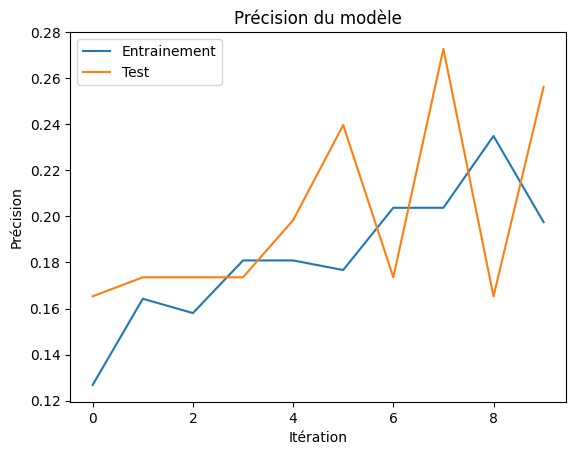

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Itération')
plt.legend(['Entrainement', 'Test'], loc='upper left')
plt.show()

In [31]:
model.layers[2].trainable = True
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(1e-5), metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 481)]                0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 481)]                0         []                            
                                                                                                  
 tf_camembert_model (TFCame  TFBaseModelOutputWithPooli   1106219   ['input_token[0][0]',         
 mbertModel)                 ngAndCrossAttentions(last_   52         'masked_token[0][0]']        
                             hidden_state=(None, 481, 7                                           
                             68),                                                           

In [32]:
history = model.fit([output_tokenizer_entrainement['input_ids'],output_tokenizer_entrainement['attention_mask']],y_train_nlp,
                    epochs=20, verbose=1, batch_size = 8,
                    validation_data=([output_tokenizer_tests['input_ids'],output_tokenizer_tests['attention_mask']],y_test_nlp))

Epoch 1/20
61/61 [==============================] - 101s 1s/step - loss: 2.5211 - accuracy: 0.2869 - val_loss: 2.4716 - val_accuracy: 0.3223
Epoch 2/20
61/61 [==============================] - 58s 948ms/step - loss: 2.3284 - accuracy: 0.3597 - val_loss: 2.3248 - val_accuracy: 0.4380
Epoch 3/20
61/61 [==============================] - 58s 949ms/step - loss: 2.1685 - accuracy: 0.4595 - val_loss: 2.2079 - val_accuracy: 0.4545
Epoch 4/20
61/61 [==============================] - 58s 948ms/step - loss: 2.0360 - accuracy: 0.4990 - val_loss: 2.1171 - val_accuracy: 0.4711
Epoch 5/20
61/61 [==============================] - 58s 949ms/step - loss: 1.9313 - accuracy: 0.5322 - val_loss: 2.0349 - val_accuracy: 0.4959
Epoch 6/20
61/61 [==============================] - 58s 951ms/step - loss: 1.7558 - accuracy: 0.5988 - val_loss: 1.9462 - val_accuracy: 0.5041
Epoch 7/20
61/61 [==============================] - 58s 948ms/step - loss: 1.6309 - accuracy: 0.6175 - val_loss: 1.8713 - val_accuracy: 0.5207
E

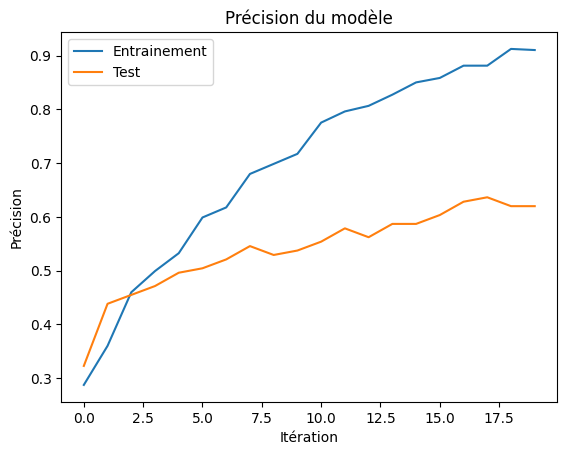

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Itération')
plt.legend(['Entrainement', 'Test'], loc='upper left')
plt.show()

In [73]:
# custom_objects = {'TFCamembertModel': TFCamembertModel}
# model_path =  "./nlp_2111_non_aug.h5"
# loaded_model = tf.keras.models.load_model(model_path, custom_objects=custom_objects)

# loaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 481)]                0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 481)]                0         []                            
                                                                                                  
 tf_camembert_model_4 (TFCa  TFBaseModelOutputWithPooli   1106219   ['input_token[0][0]',         
 membertModel)               ngAndCrossAttentions(last_   52         'masked_token[0][0]']        
                             hidden_state=(None, 481, 7                                           
                             68),                                                           

In [74]:
def encode_texts(texts, tokenizer, max_seq_length):
    input_ids = []

    encoded = tokenizer(texts,max_length=max_seq_length, padding='max_length', truncation=False, return_tensors='tf',add_special_tokens=True)
    input_ids.append([encoded["input_ids"],encoded["attention_mask"]])
    return input_ids

def prediction(model, max_seq_length, *args) :
    texts = list(*args)
    to_test = encode_texts(texts=texts, tokenizer=tokenizer, max_seq_length=max_seq_length)
    proba = model.predict(*to_test)
    indexes = np.argmax(proba, axis=1)
    return le.inverse_transform(indexes)

In [78]:
text_test = 'défaut vibration courroie'
test1 = 'cellule flacons retournés HS'
test2 = 'réglage position IPC'
prediction(loaded_model, LONGUEUR_MAX_COMMENTAIRE,[text_test,test1,test2])

1/1 [==============================] - 5s 5s/step


array(['courroie', 'cellules ', 'cellules '], dtype=object)